In [1]:
import numpy as np
import sys
import os
sys.path.append(os.path.join(os.getcwd(),"../Algorithm encapsulation"))
sys.path.append(os.path.join(os.getcwd(),".."))
print(sys.path)
from LMband import LMband
import pandas as pd
from ga_platoon import max_dt

['f:\\workspace\\jupyter\\论文\\graduation thesis\\Case Analysis', 'd:\\anaconda\\envs\\cplex\\python37.zip', 'd:\\anaconda\\envs\\cplex\\DLLs', 'd:\\anaconda\\envs\\cplex\\lib', 'd:\\anaconda\\envs\\cplex', '', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\chardet-3.0.4-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\docloud-1.0.375-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\urllib3-1.25.11-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\fonttools-4.36.0-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\cvxopt-1.3.0-py3.7-win-amd64.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\pytz-2022.2.1-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\win32', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\win32\\lib', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\Pythonwin', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\0\\.ipython', 'f:\\wor

In [2]:
def get_rf(d,p):
    tmp=[]
    for i,a in enumerate(p):
        idx=np.where(a!=0)[0]
        a=a&0
        if len(idx)>0:
            a[:idx[0]]=1
        tmp.append((d[i]*a).sum())
    return tmp

In [3]:
phase = np.loadtxt("./data/phase")
cir=phase[0].sum()
phase=phase/cir
vol = np.loadtxt("./data/volume")
qv = np.loadtxt("./data/path_vol")
phase_get = np.load("./data/phase_get.npy")
d = np.loadtxt("./data/distance")
straight_get = np.load("./data/straight_get.npy")
ison = np.array([0, 0, 0, 1, 1, 1])
px = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
pxb = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
qb=[120,120]
lower, upper = 4, 10
linspace = np.arange(lower, upper, 1)
lin_num = len(linspace)

# 南北直行方向绿灯时间
sg=np.array([(straight_get[i]*phase).sum(axis=1) for i in range(len(straight_get))])
rho = vol[0] / vol[1]
num = len(vol[0])
numr = len(qv)
nump = len(phase_get)
M = 1e6
nx = 0.00000001
be = 8
speedScope = np.array([lower, upper])
speedVar = np.array([-2, 2])

g=np.array([(phase_get[i]*phase).sum(axis=1) for i in range(numr) ])
r=1-g
rf=np.array([get_rf(phase,phase_get[i]) for i in range(numr)])

ex=[1,0,1,0,1,0,1,1,1,1,1,0]
dwt=15
qb_x=np.ones_like(sg)*20
cap=np.ones_like(sg,dtype=int)*3

spd_on=pd.read_csv(os.path.join(os.getcwd(),"..","speed analysis","上行速度数据.csv"),index_col=0)
spd_in=pd.read_csv(os.path.join(os.getcwd(),"..","speed analysis","下行速度数据.csv"),index_col=0)

In [4]:
lmb=LMband(phase, [80,180], vol, qv, phase_get, d, straight_get, ison, px, pxb, qb,qb_x,cap, lower, upper, 
           linspace, be, speedVar[0], speedVar[1],ex, dwt,lower,upper,speedVar[0], speedVar[1],spd_on,spd_in)
lmb._M1_solve()

Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125

Multi-objective solve log . . .

Index  Priority  Blend          Objective      Nodes  Time (sec.)  DetTime (ticks)

Performing restart 1
    1         0      3   1.7800948121e+04      12314         1.06           824.03
status  = multi-objective optimal
time    = 1.063 s.
problem = MILP
gap     = 2.62889e+73%

object value: 3804


In [5]:
lmb._M2_solve()

[[array([0.0711, 0.0935, 0.0965, 0.0782, 0.0498, 0.0249]), array([0.0351, 0.0651, 0.0928, 0.1018, 0.086 , 0.0558]), array([0.0472, 0.0758, 0.0956, 0.0947, 0.0737, 0.045 ]), array([0.000e+00, 1.000e-04, 2.700e-03, 2.830e-02, 1.178e-01, 1.926e-01])], [array([0.0788, 0.1344, 0.1359, 0.0814, 0.0289, 0.0061]), array([0.0425, 0.1641, 0.2013, 0.0784, 0.0097, 0.0004]), array([0.0388, 0.0603, 0.0783, 0.0848, 0.0767, 0.0578]), array([0.0065, 0.055 , 0.1683, 0.1853, 0.0736, 0.0105])]]
conflict(s): 0
Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125

Multi-objective solve log . . .

Index  Priority  Blend          Objective      Nodes  Time (sec.)  DetTime (ticks)

Performing restart 1
    1         2      2   1.8793548053e+04       6487         0.95           679.99

Performing restart 1

Performing restart 2
    2         1      1   5.8262468958e+01     175751        18.17         

In [6]:
lmb.get_dataframe()

,cross_number,distance,b1,b2,b3,b4,b5,b6,offset,p,...,u3,u4,u5,u6,bb1,bb2,dw1,dw2,tb1,tb2
0,1.0,800.0,34.545000,34.545000,0.000000,40.005530,0.000000,40.425000,0.000000,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,34.545000,40.425000,15.000000,15.0,121.887500,103.145000
1,2.0,520.0,22.907500,22.907500,0.000000,40.425000,0.000000,40.425000,121.887500,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,22.907500,40.425000,15.000000,15.0,52.000000,104.248750
2,3.0,500.0,22.907500,22.907500,0.000000,24.500000,0.000000,24.500000,57.206250,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,22.907500,24.500000,15.000000,15.0,65.000000,82.551250
3,4.0,490.0,31.237500,31.237500,0.000000,24.500000,0.000000,24.500000,115.346250,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,31.237500,24.500000,15.000000,15.0,121.152500,122.500000
4,5.0,370.0,31.237500,31.237500,0.000000,31.237500,0.000000,31.237500,116.693750,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,31.237500,31.237500,15.000000,15.0,54.928749,92.500000
5,6.0,254.0,20.435970,18.081208,20.435970,54.664116,0.000000,54.664116,-0.000002,1.0,...,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,20.435970,54.664116,15.000000,15.0,41.584567,25.400000
6,7.0,585.0,20.435970,18.081208,20.435970,20.435970,0.000000,20.435970,75.812712,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,20.435970,20.435970,23.760275,15.0,84.098640,73.500000
7,8.0,1020.0,22.861758,0.000000,22.861758,0.000000,34.639027,0.000000,9.213980,1.0,...,1.000000e-08,1.000000e-08,4.415625e-08,1.000000e-08,22.861758,22.861758,15.000000,15.0,138.556107,138.556107
8,9.0,409.0,15.951949,0.000000,41.289732,0.000000,34.639027,0.000000,-0.000007,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,41.289720,22.861758,36.306107,15.0,138.556107,71.602717
9,10.0,547.0,68.220000,0.000000,68.220000,68.220000,68.220000,0.000000,79.690000,1.0,...,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,68.220000,68.220000,15.000000,15.0,100.310000,69.700000


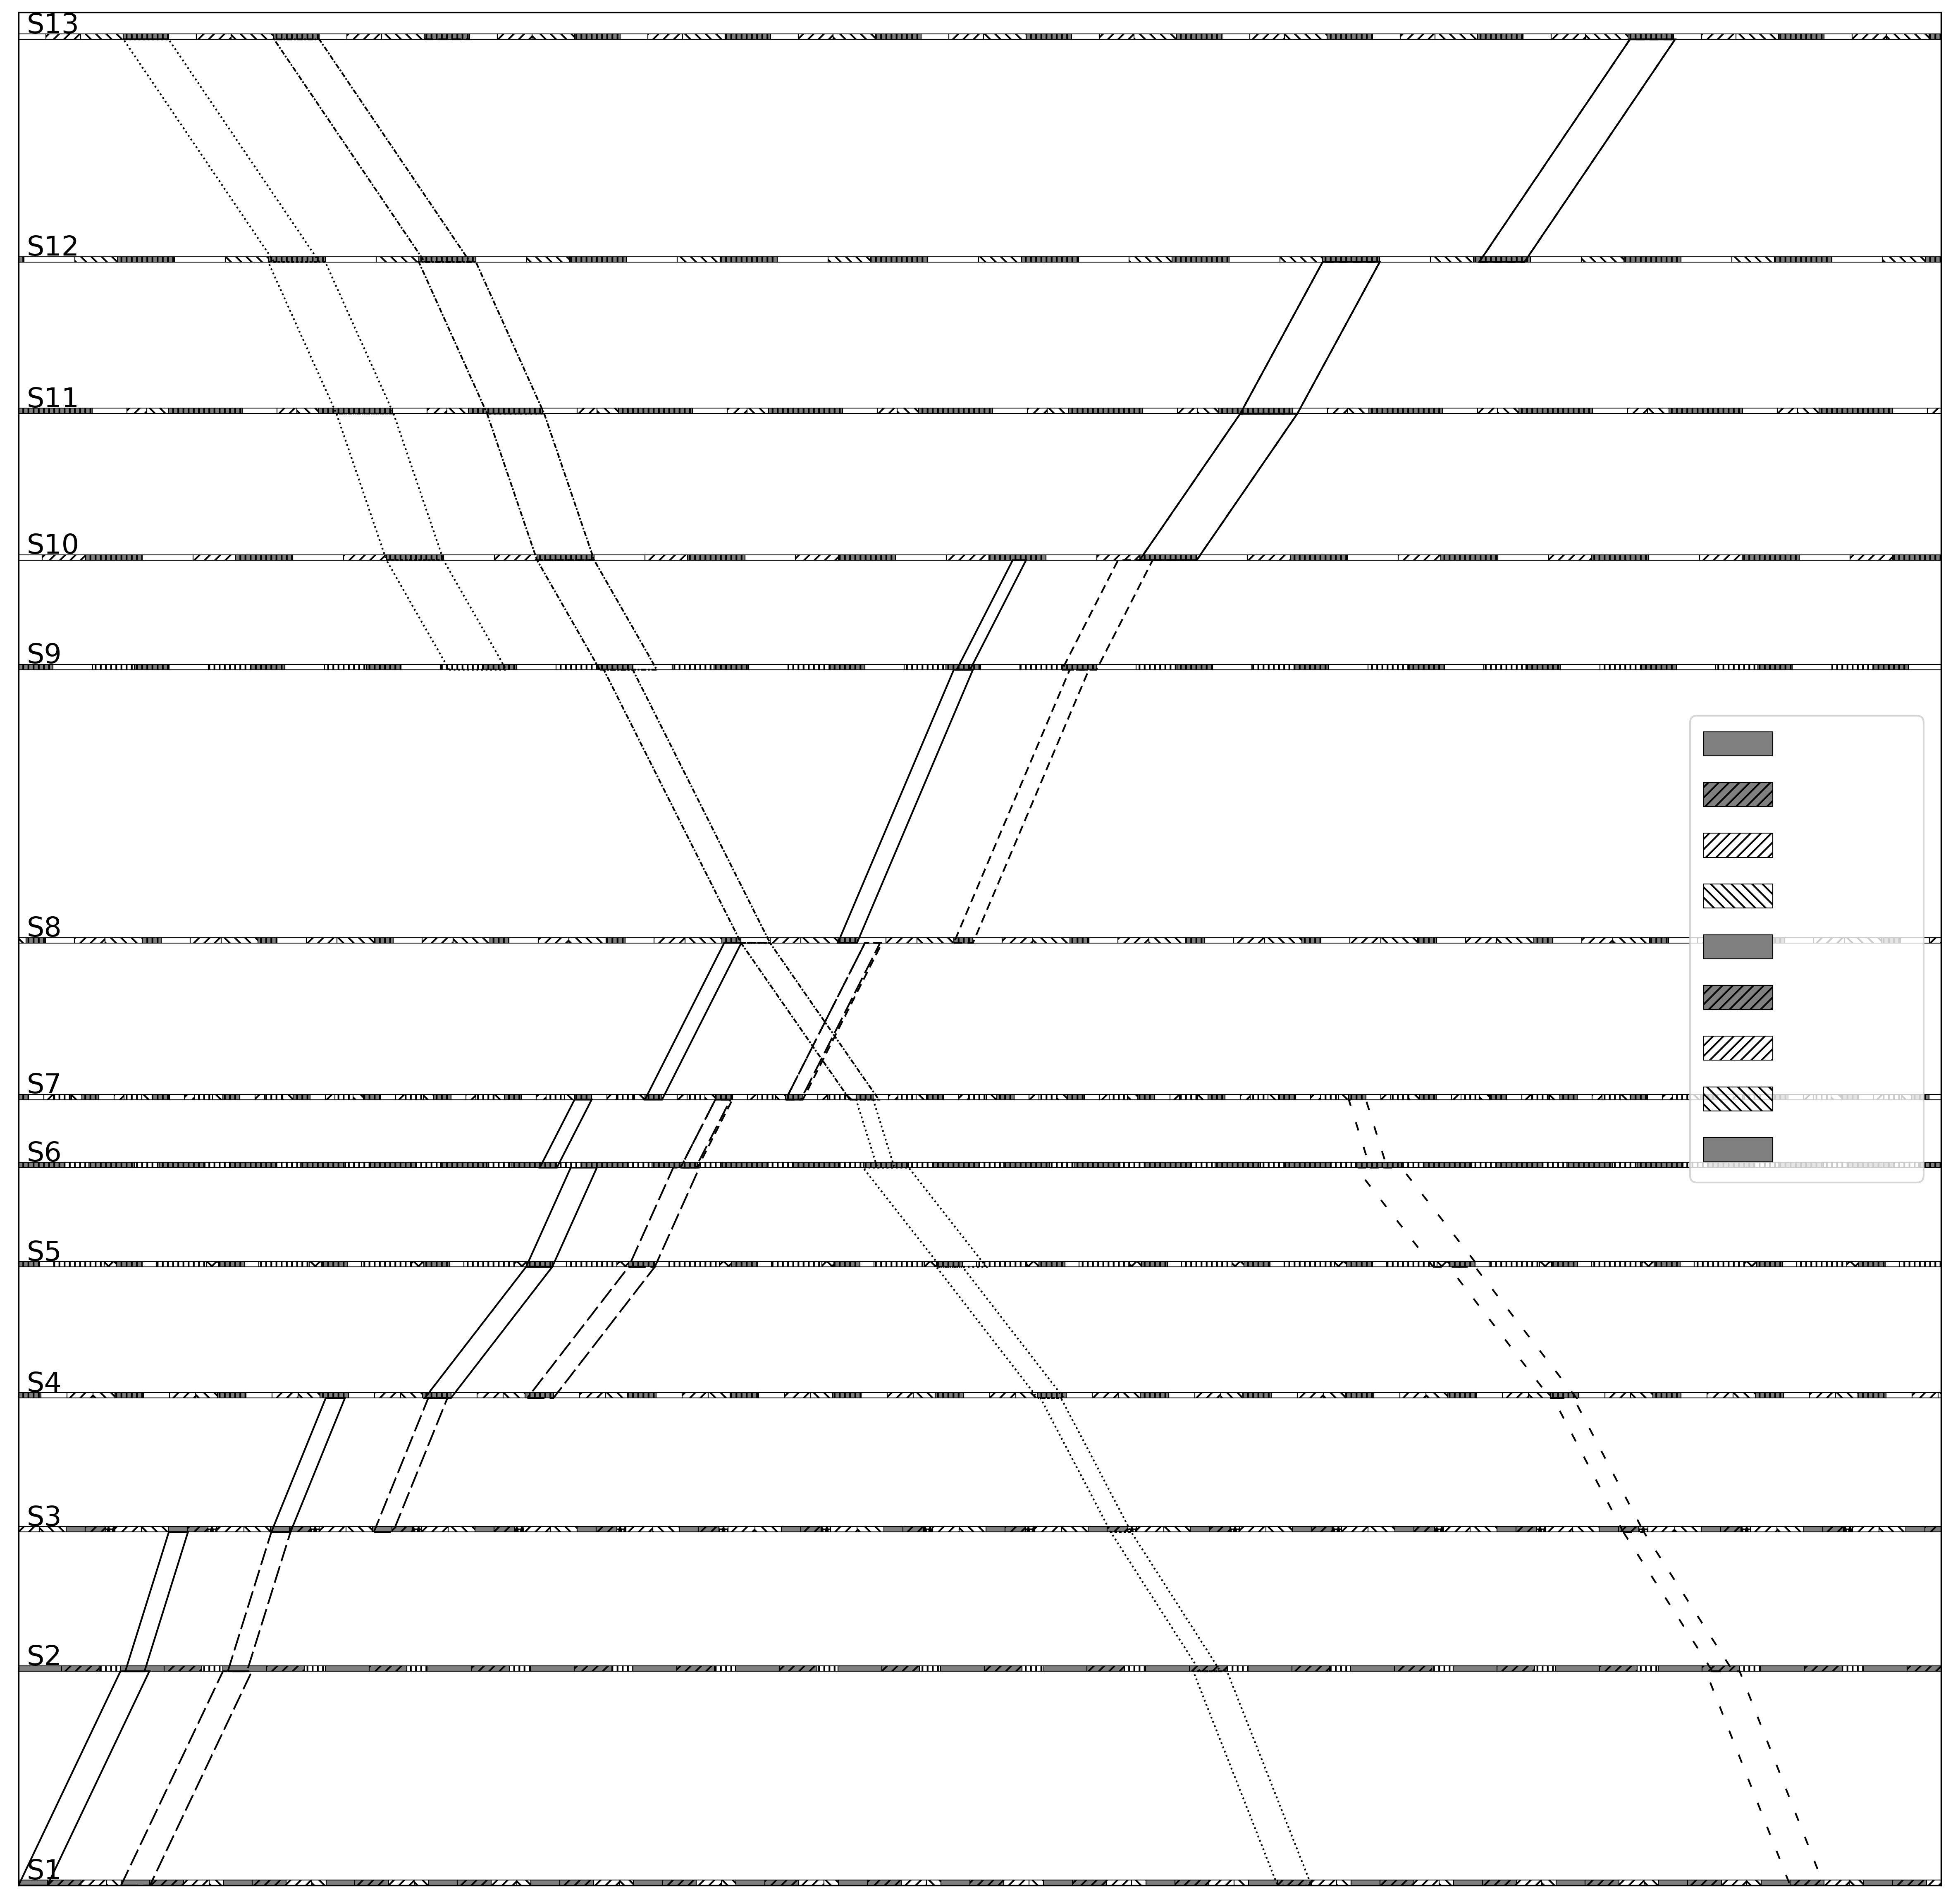

In [7]:
colors=[
            {"color":"gray" , "hatch": None, "fill": True},
            {"color":"gray", "hatch":"||||" , "fill": True},
            {"color": "gray", "hatch":"////" , "fill": True},
            {"color":"white", "hatch": "****", "fill": False},
            {"color": "white", "hatch": None, "fill": False},
            {"color": "white", "hatch": "////", "fill": False},
            {"color": "white", "hatch": "||||", "fill": False},
            {"color": "white", "hatch": "\\\\\\\\", "fill": False},
            {"color": "white", "hatch": "xxxx", "fill": False},
            {"color": "white", "hatch": "....", "fill": False},
        ]
linestyles=[
    {"linestyle":"-" },
    {"linestyle":(5,(10,3))},
    {"linestyle":(0, (5, 3)) },
    {"linestyle":":" },
    {"linestyle":(0, (3, 1, 1, 1)) },
    {"linestyle": (0, (5, 10)) },
]
legends=["1->15", "1->6", "8->15", "15->2", "14->9", "7->1"]
lmb.draw_car_bound("./时距图",colors,legends,2,linestyles)

1925.499999995512 15.718367346902141


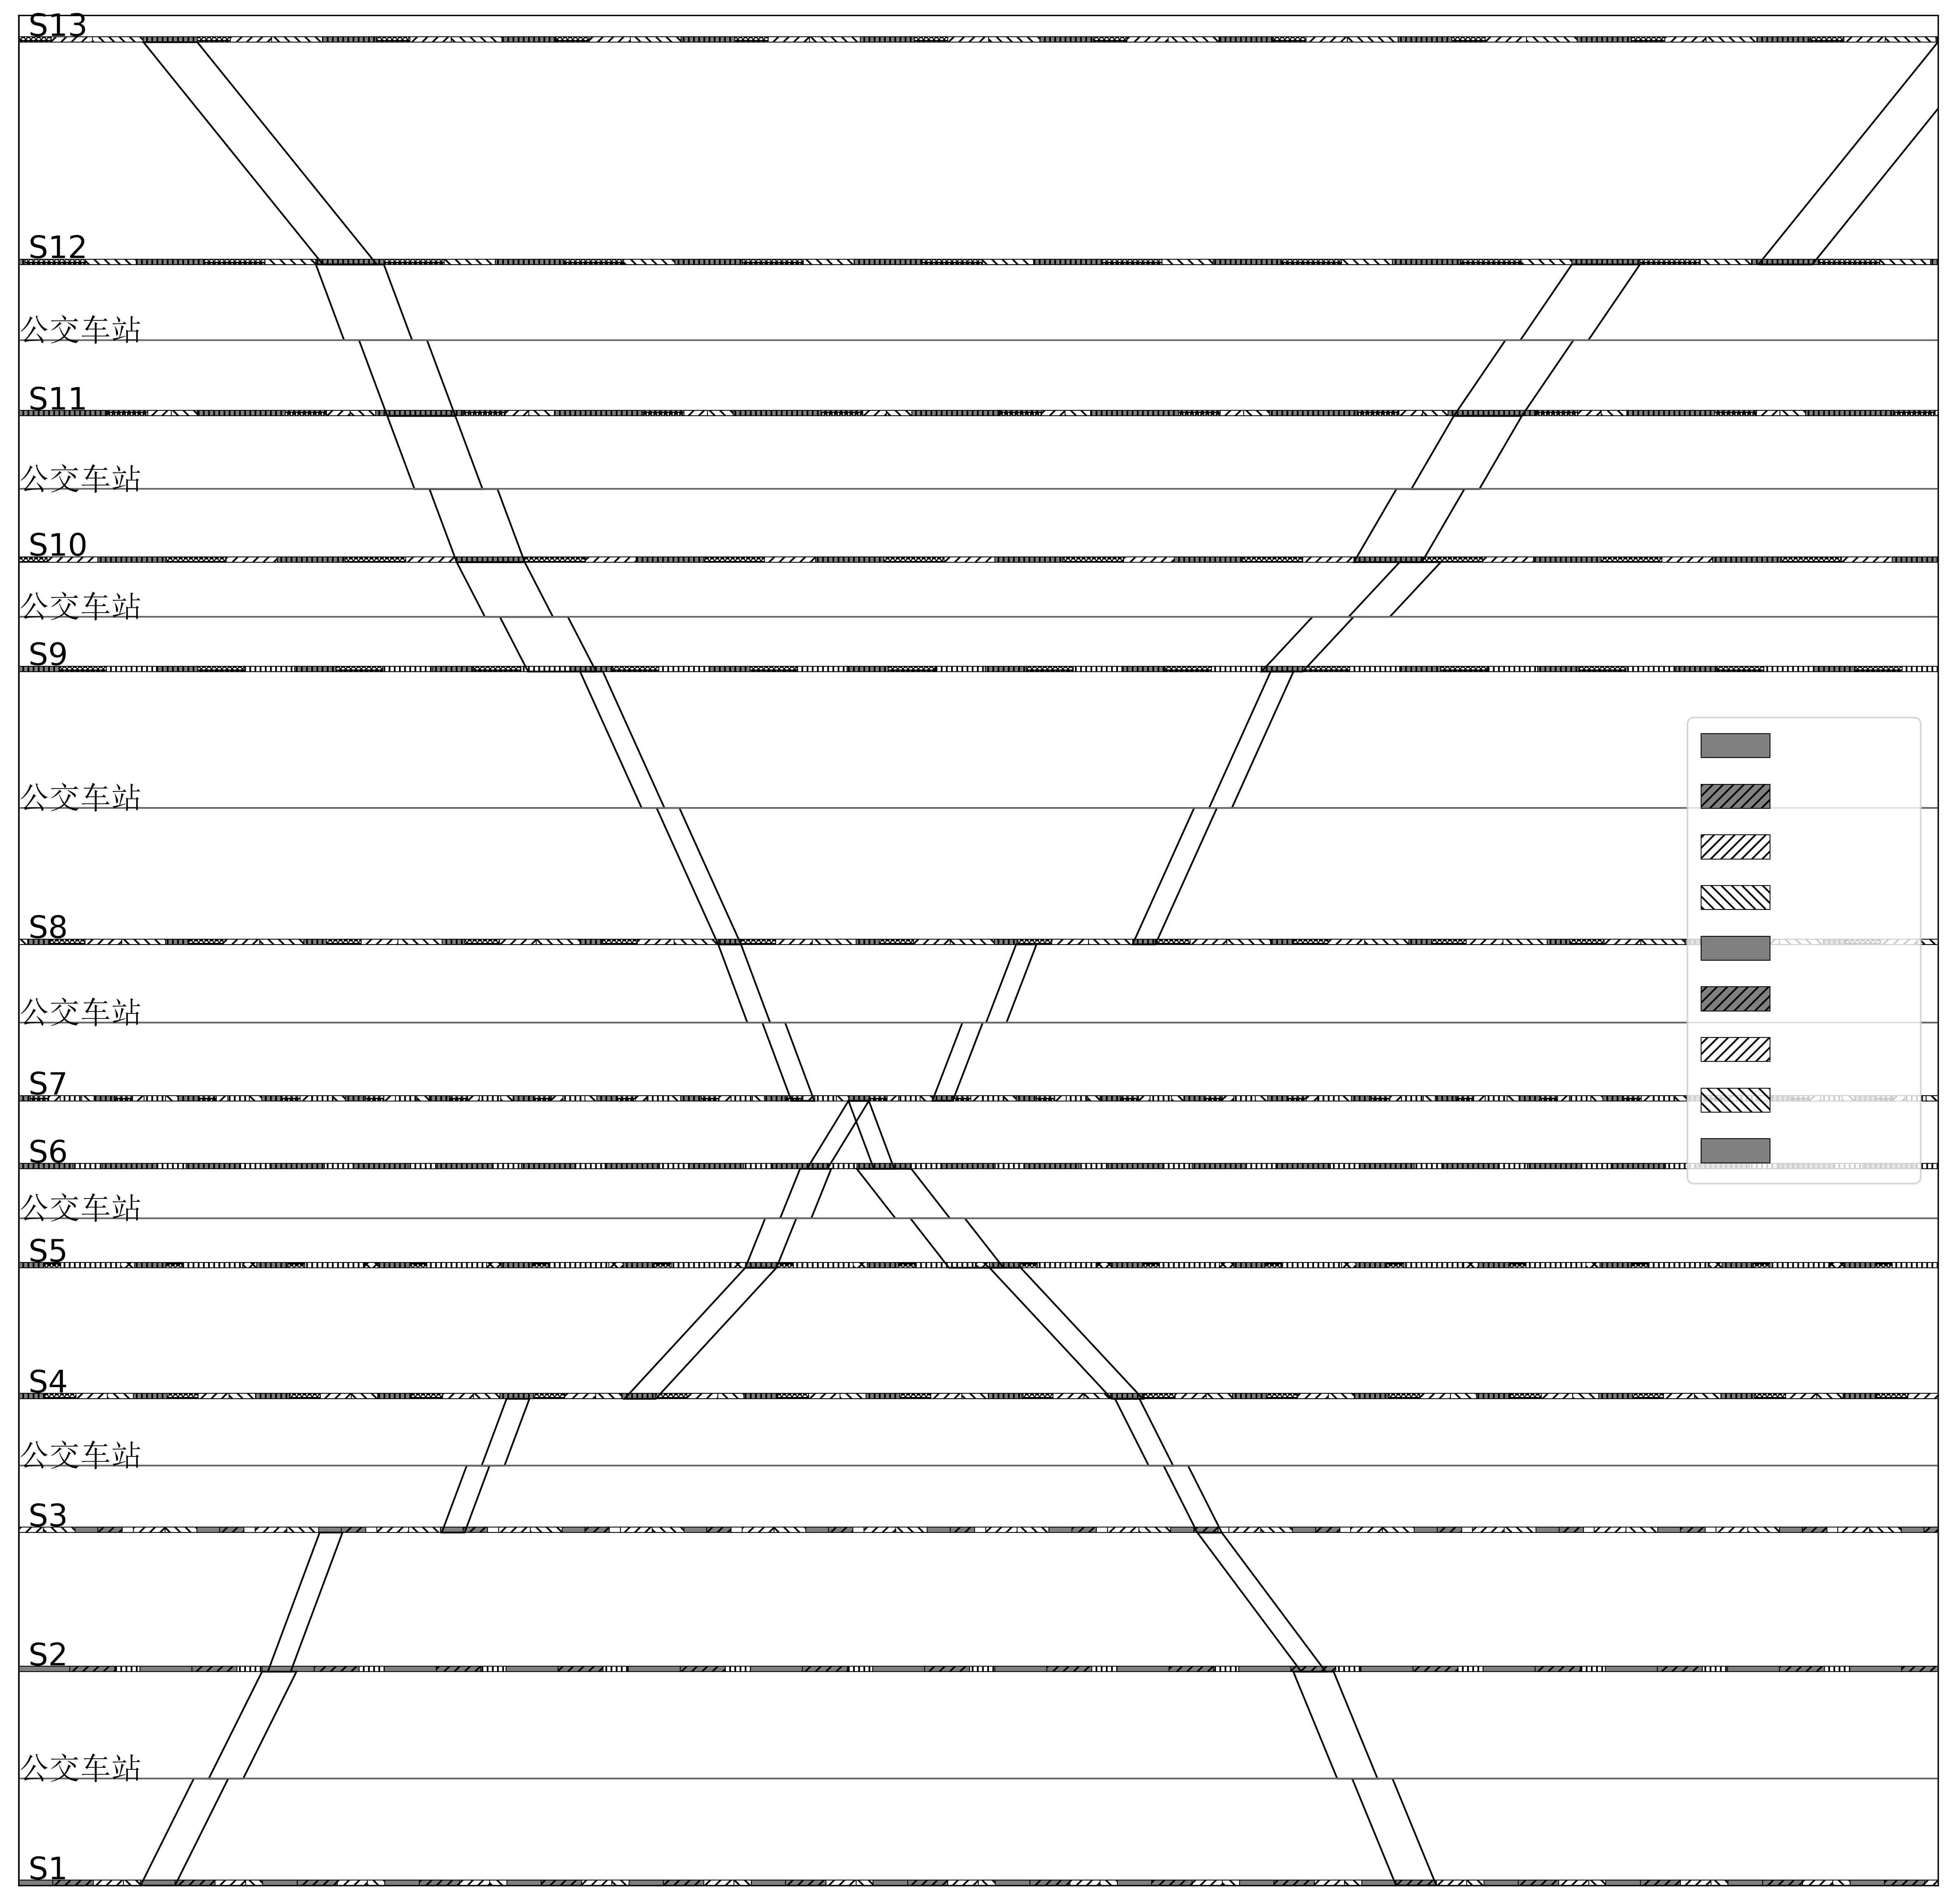

In [8]:
colors=[
            {"color":"gray" , "hatch": None, "fill": True},
            {"color":"gray", "hatch":"||||" , "fill": True},
            {"color": "gray", "hatch":"////" , "fill": True},
            {"color":"white", "hatch": None, "fill": False},
            {"color": "white", "hatch": "****", "fill": False},
            {"color": "white", "hatch": "////", "fill": False},
            {"color": "white", "hatch": "||||", "fill": False},
            {"color": "white", "hatch": "\\\\\\\\", "fill": False},
            {"color": "white", "hatch": "xxxx", "fill": False},
            {"color": "white", "hatch": "....", "fill": False},
        ]
lmb.draw_bus_bound("./公交时距图",colors)

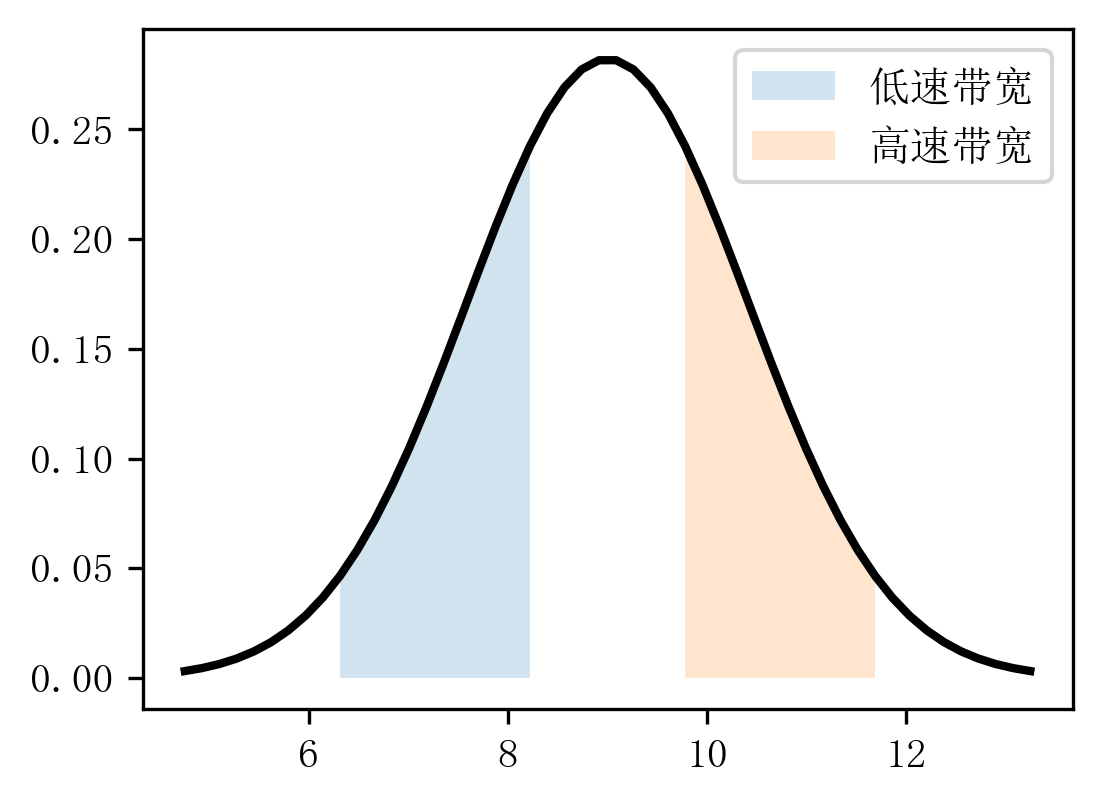

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']="SimSun"
fig = plt.figure(figsize=(4,3), dpi=300)
u = 9   # 均值μ
sig = math.sqrt(2)  # 标准差δ
x = np.linspace(u - 3*sig, u + 3*sig, 50)   # 定义域
y = np.exp(-(x - u) ** 2 / (2 * sig ** 2)) / (math.sqrt(2*math.pi)*sig) # 定义曲线函数
plt.plot(x, y, "black", linewidth=2)    # 加载曲线
l1=plt.fill_between(x, y, 0,where=((x>=u-2*sig)&(x<=u-sig/2)), alpha=0.2)
l2=plt.fill_between(x, y, 0,where=((x<=u+2*sig)&(x>=u+sig/2)), alpha=0.2)
# plt.grid(True)  # 网格线
plt.legend([l1,l2],["低速带宽","高速带宽"])
plt.show()  # 显示
fig.savefig("./正态分布")